In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import importlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

from os import listdir
from os.path import isfile, join
import os

In [33]:
############## Select device ################

device = 'charge_qubit' # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

#############################################

data = np.load('../../data/params/'+device+'.npz', allow_pickle=True)
wq, g, kappa, dim = data['wq'], data['g'], data['kappa'], data['dim']

In [34]:
###### List available file to be plotted ########

path = '../../data/'+device

for file in os.listdir(path):
    if file.startswith("SNR_params"):
        if file.endswith(".npz"):
            print(file)

#################################################

SNR_params_and_analytics_N_rep=60_n_states=2_dim=2_num_w=151_final_t=0.2_compensation=False.npz
SNR_params_and_analytics_N_rep=40_n_states=2_dim=2_num_w=151_final_t=0.2_compensation=False.npz
SNR_params_and_analytics_N_rep=40_n_states=2_dim=2_num_w=151_final_t=0.5_compensation=False.npz


In [35]:
############# Select one set of parameters ################

dim = 2
num_w = 151
compensation = False

n_states_list = [2]
N_rep_list = [40,60]

final_t = 0.2

###########################################################

In [36]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

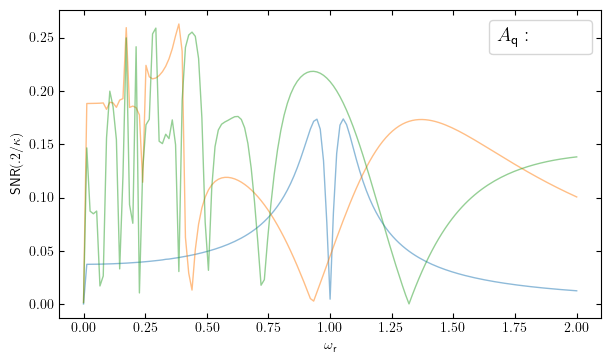

In [37]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(7,4), dpi=100)

import matplotlib.colors as mcolors
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

for n,n_states in enumerate(n_states_list):
    for m,N_rep in enumerate(N_rep_list):
        
        fname = path+'/SNR_params_and_analytics_N_rep='+str(N_rep)+'_n_states='+str(n_states)\
            +'_dim='+str(dim)+'_num_w='+str(num_w)+'_final_t='+str(final_t)+'_compensation='+str(compensation)

        import_npz(fname+'.npz')

        for idx,A in enumerate(Alist):
            ax.plot(wlist, np.real(res_an[idx,:]), color=colors[idx], lw=n+1, alpha=(m+1)/(len(N_rep_list)+1))   

ax.xaxis.set_tick_params(direction="in", which='both')
ax.yaxis.set_tick_params(direction="in", which='both')
ax.set_xlabel(r'$\omega_{\text{r}}$')

ax.set_ylabel(r'$\text{SNR}(.2/\kappa)$')
ax.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

h, l = ax.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]] # Canvas
handles = ph + h
labels = [r'$A_{\text{q}}:$'] + l  # Merging labels
leg = ax.legend(handles, labels, fontsize="14", ncol=4, markerfirst=False)